In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
%matplotlib inline

In [2]:
data = pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
#data.shape

In [4]:
#data.info()

In [5]:
if 'Income' in data:    
    data['Income'] = data['Income'].str.replace('$','')
    data['Income'] = data['Income'].str.replace(',','')
    data['Income'] = pd.to_numeric(data['Income'])
    print(data['Income'].head())
else:
    print(f"Error")

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64


In [6]:
print(f"{data['Education'].value_counts()}\n")
print(f"{data['Marital_Status'].value_counts()}\n")
print(f"{data['Country'].value_counts()}\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64



In [7]:
# data = data.drop_duplicates()
# data.info()

In [8]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'], 'Single')
print(f"{data['Marital_Status'].value_counts()}\n")

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64



In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer'].head()

C:\Users\Varun\AppData\Local\Temp\ipykernel_840\409340988.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

In [10]:
current_year = datetime.now().year

data['Age'] = current_year - data['Year_Birth']

print(data['Age'].head())


0    54
1    63
2    66
3    57
4    35
Name: Age, dtype: int64


In [11]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,35


In [12]:
missing_income_before = data['Income'].isna().sum()
print(missing_income_before)

24


In [13]:
# Imputing missing 'Income' values using the mean income of similar 'Education' and 'Marital_Status'
data['Income'] = data.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [14]:
missing_income_after = data['Income'].isna().sum()
print(missing_income_after)

0


In [15]:
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

In [16]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[spending_columns].sum(axis=1)

In [17]:
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data['Total_Purchases'] = data[purchase_columns].sum(axis=1)

In [18]:
data[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']].head()

,Total_Children,Age,Total_Spending,Total_Purchases
0,0,54,1190,14
1,0,63,577,17
2,1,66,251,10
3,2,57,11,3
4,1,35,91,6


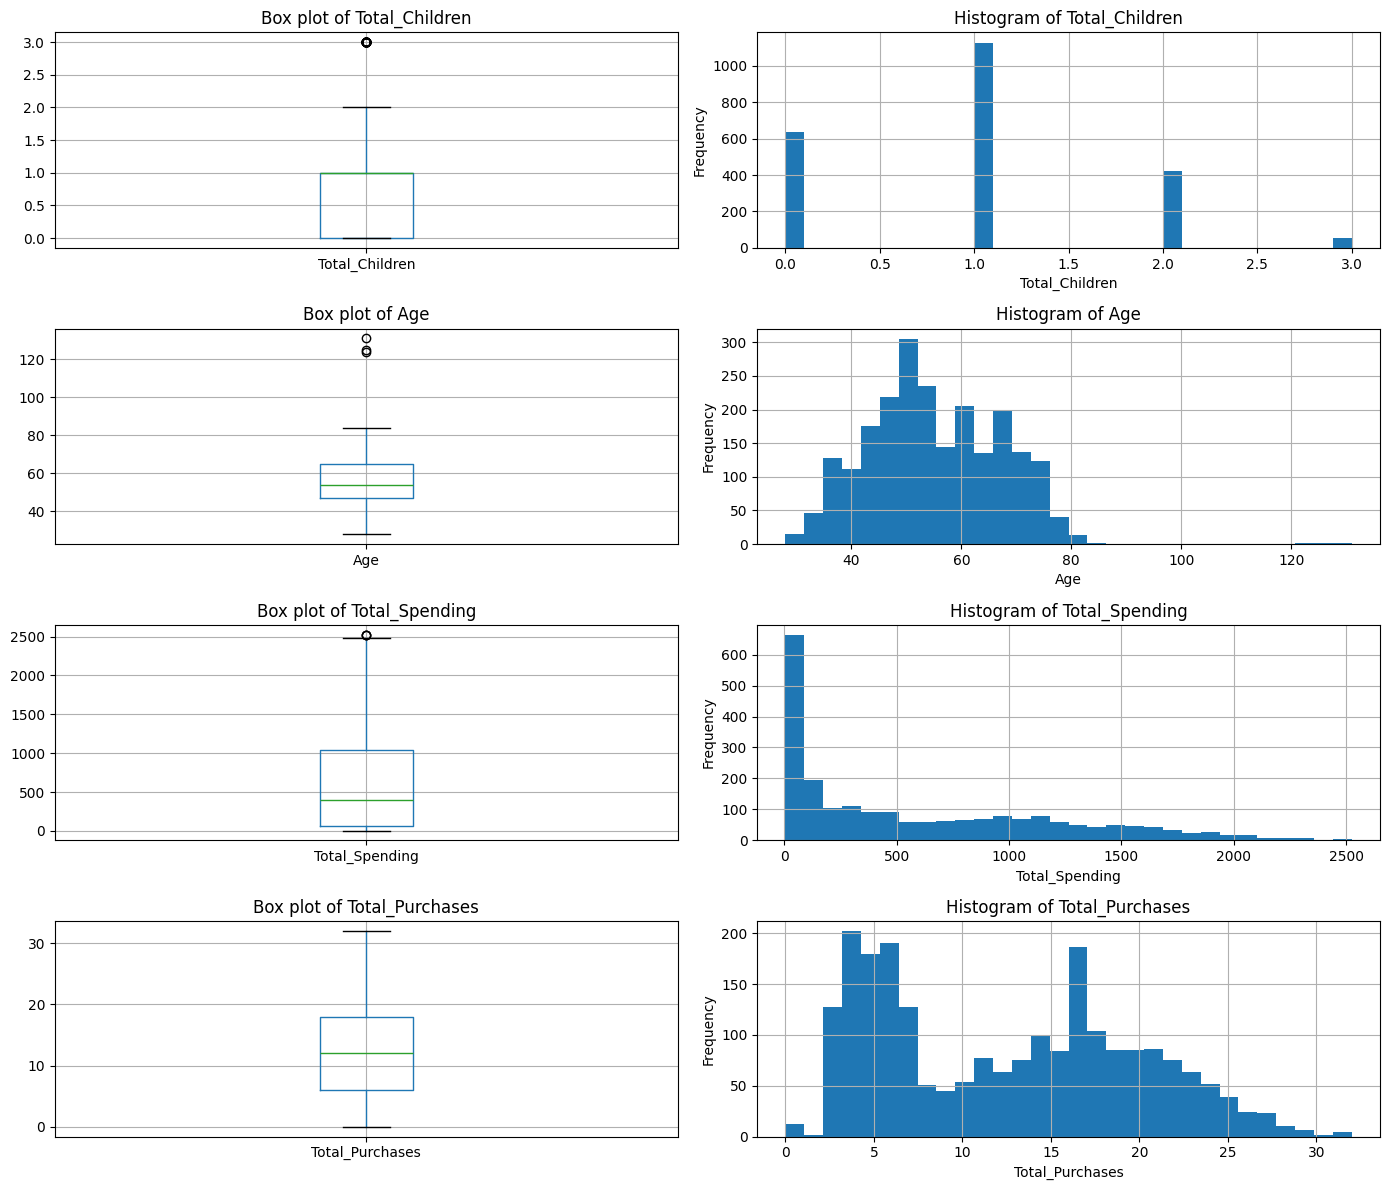

In [19]:
# Generate box plots and histograms for the new variables
variables = ['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']

plt.figure(figsize=(14, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, 2*i-1)
    data.boxplot(column=var)
    plt.title(f'Box plot of {var}')
    
    plt.subplot(4, 2, 2*i)
    data[var].hist(bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

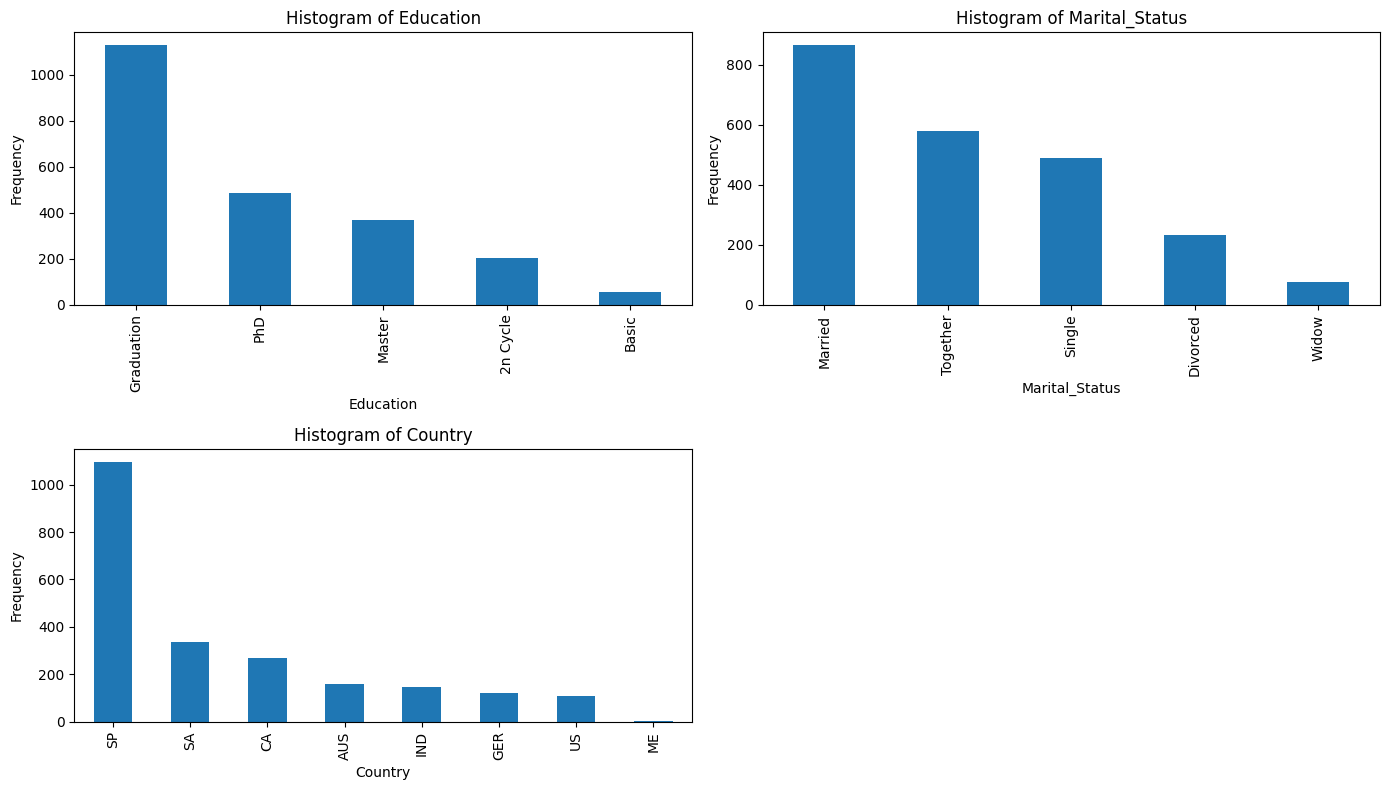

In [20]:
categorical_variables = ['Education', 'Marital_Status', 'Country']

plt.figure(figsize=(14, 8))

for i, var in enumerate(categorical_variables, 1):
    plt.subplot(2, 2, i)
    data[var].value_counts().plot(kind='bar')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for numerical variables with box plots
numerical_variables = ['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']
outliers_dict = {var: find_outliers(data, var) for var in numerical_variables}

# Display the number of outliers in each variable
outliers_count = {var: len(outliers) for var, outliers in outliers_dict.items()}
outliers_count

{'Total_Children': 53, 'Age': 3, 'Total_Spending': 3, 'Total_Purchases': 0}

In [22]:
age_outliers = outliers_dict['Age']

median_age_by_group = data.groupby(['Education'])['Age'].median()

# Function to replace outliers in Age based on Education group median
def replace_age_outliers(row):
    if row['Age'] in age_outliers['Age'].values:
        return median_age_by_group[row['Education']]
    return row['Age']

# Apply the function to replace the outliers in Age
data['Age'] = data.apply(replace_age_outliers, axis=1)

# Verify the changes
age_outliers_after = find_outliers(data, 'Age')
age_outliers_after

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Children,Total_Spending,Total_Purchases


In [23]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Children,Total_Spending,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,54.0,0,1190,14
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,63.0,0,577,17
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,66.0,1,251,10
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,57.0,2,11,3
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,35.0,1,91,6


In [24]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Encoding 'Education' with Ordinal Encoding
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
data['Education_Encoded'] = ordinal_encoder.fit_transform(data[['Education']])

# Encoding 'Marital_Status' and 'Country' with One-Hot Encoding
one_hot_encoder_marital = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
one_hot_encoder_country = OneHotEncoder(sparse_output=False, drop='first')

marital_status_encoded = one_hot_encoder_marital.fit_transform(data[['Marital_Status']])
country_encoded = one_hot_encoder_country.fit_transform(data[['Country']])

# Creating DataFrames from the encoded arrays
marital_status_encoded_df = pd.DataFrame(marital_status_encoded, columns=one_hot_encoder_marital.get_feature_names_out(['Marital_Status']))
country_encoded_df = pd.DataFrame(country_encoded, columns=one_hot_encoder_country.get_feature_names_out(['Country']))

# Concatenating the encoded columns to the original dataset
data_encoded = pd.concat([data, marital_status_encoded_df, country_encoded_df], axis=1)

# Dropping the original categorical columns
data_encoded.drop(['Education', 'Marital_Status', 'Country'], axis=1, inplace=True)

data_encoded.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


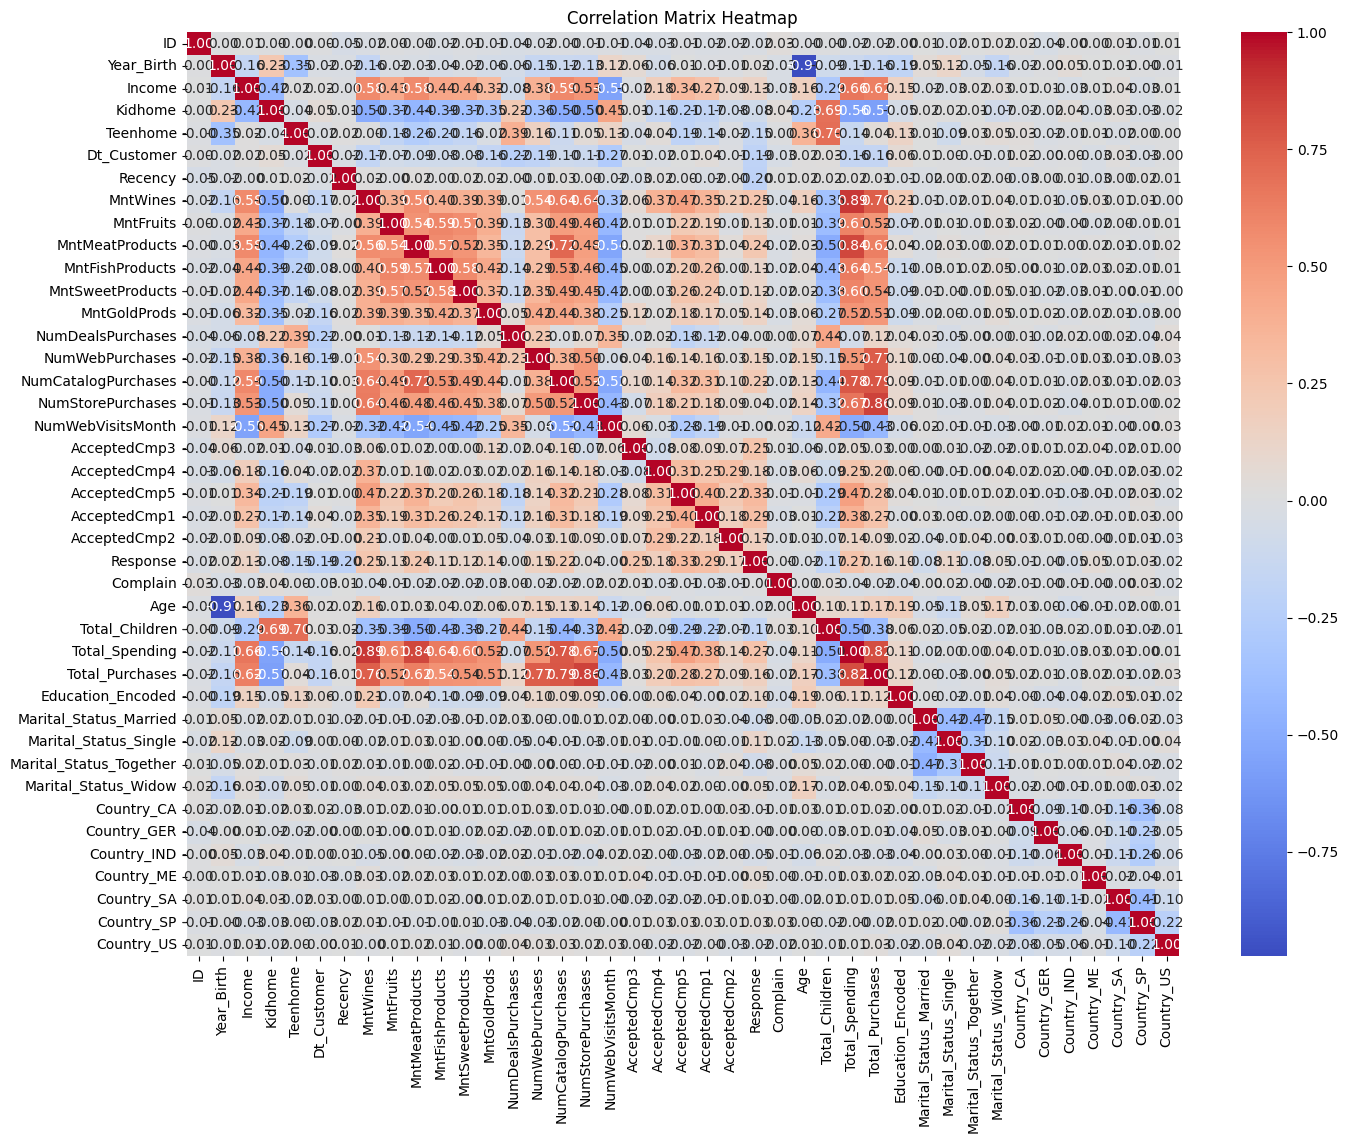

In [25]:
import seaborn as sns

# Generate a correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

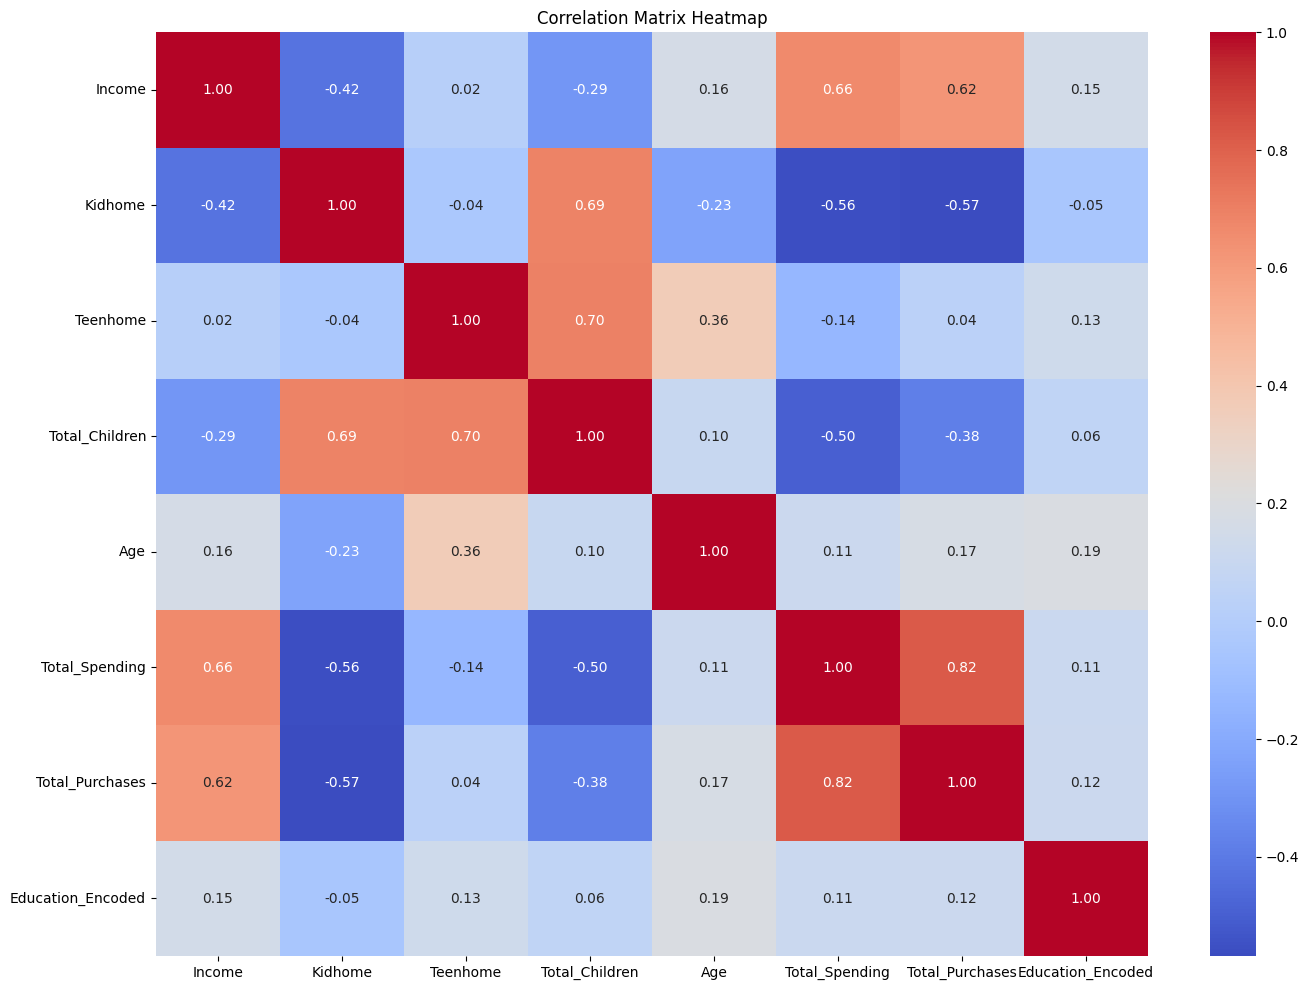

,Income,Kidhome,Teenhome,Total_Children,Age,Total_Spending,Total_Purchases,Education_Encoded
Income,1.000000,-0.424954,0.019260,-0.290377,0.163106,0.664502,0.622571,0.149494
Kidhome,-0.424954,1.000000,-0.036133,0.689971,-0.234084,-0.556669,-0.568637,-0.053660
Teenhome,0.019260,-0.036133,1.000000,0.698433,0.363035,-0.138384,0.037902,0.134794
Total_Children,-0.290377,0.689971,0.698433,1.000000,0.095312,-0.498888,-0.379773,0.059204
Age,0.163106,-0.234084,0.363035,0.095312,1.000000,0.114282,0.173633,0.194348
Total_Spending,0.664502,-0.556669,-0.138384,-0.498888,0.114282,1.000000,0.820687,0.107610
Total_Purchases,0.622571,-0.568637,0.037902,-0.379773,0.173633,0.820687,1.000000,0.115239
Education_Encoded,0.149494,-0.053660,0.134794,0.059204,0.194348,0.107610,0.115239,1.000000


In [26]:
# Selecting relevant columns for the correlation matrix
# relevant_columns = [
#     'Income', 'Kidhome', 'Teenhome', 
#     'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
#     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
#     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
#     'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases',
#     'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
#     'AcceptedCmp5', 'Response', 'Education_Encoded'
# ]

relevant_columns = [
    'Income', 'Kidhome', 'Teenhome', 
    'Total_Children', 'Age', 'Total_Spending', 'Total_Purchases', 'Education_Encoded'
]

# If there are one-hot encoded columns for Marital_Status and Country, include them if relevant:
#one_hot_columns = [col for col in data_encoded.columns if col.startswith('Marital_Status_') or col.startswith('Country_')]
#relevant_columns.extend(one_hot_columns)

# Generate the correlation matrix for the selected columns
correlation_matrix = data_encoded[relevant_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Display the correlation matrix as a DataFrame
correlation_matrix

Hypothesis (a): Older individuals and in-store shopping preferences

Visualization: Scatter plot of Age vs. Number of Store Purchases

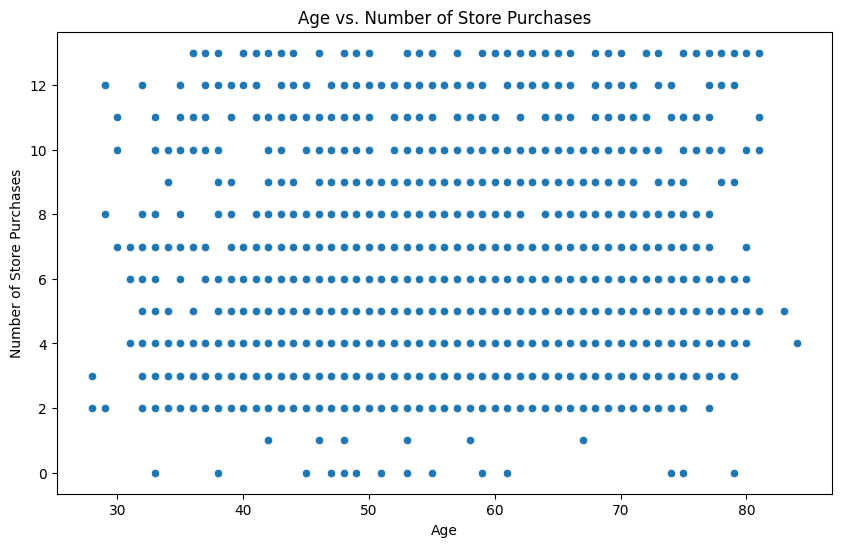

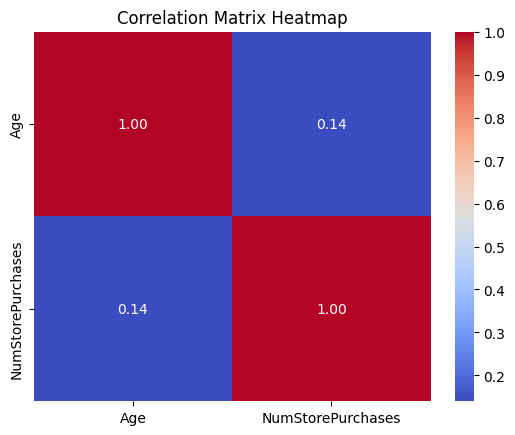

0.13985613955266413

In [38]:
from scipy.stats import pearsonr

# Scatter plot of Age vs. NumStorePurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='NumStorePurchases', data=data_encoded)
plt.title('Age vs. Number of Store Purchases')
plt.xlabel('Age')
plt.ylabel('Number of Store Purchases')
plt.show()

relevant_columns = ['Age', 'NumStorePurchases']
corr_matrix_agevsstore = data_encoded[relevant_columns].corr()
sns.heatmap(corr_matrix_agevsstore, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation between Age and NumStorePurchases
age_store_corr, _ = pearsonr(data_encoded['Age'], data_encoded['NumStorePurchases'])
age_store_corr

Since the correlation is positive, it implies there is observed to be an increase in in-store purchases as age increases

Hypothesis (b): Customers with children and online shopping

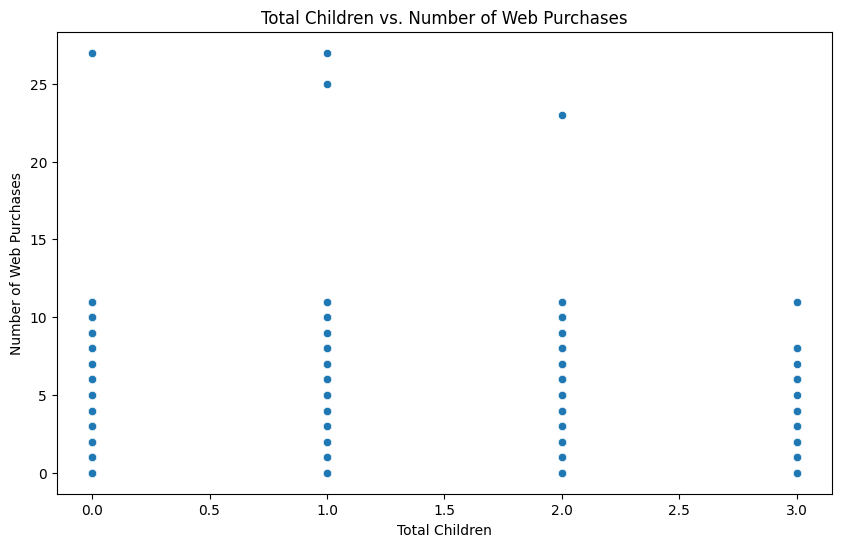

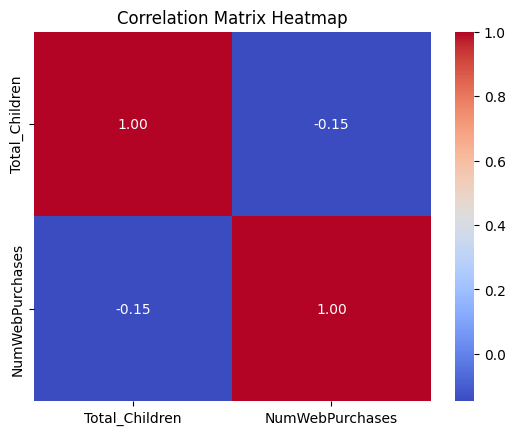

-0.14636099342770975

In [39]:
# Scatter plot of Total_Children vs. NumWebPurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Children', y='NumWebPurchases', data=data_encoded)
plt.title('Total Children vs. Number of Web Purchases')
plt.xlabel('Total Children')
plt.ylabel('Number of Web Purchases')
plt.show()

relevant_columns = ['Total_Children', 'NumWebPurchases']
corr_matrix_childvsweb = data_encoded[relevant_columns].corr()
sns.heatmap(corr_matrix_childvsweb, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation between Total_Children and NumWebPurchases
children_web_corr, _ = pearsonr(data_encoded['Total_Children'], data_encoded['NumWebPurchases'])
children_web_corr

As the total number of children in a household increases, it is less likely they will perform web purchases

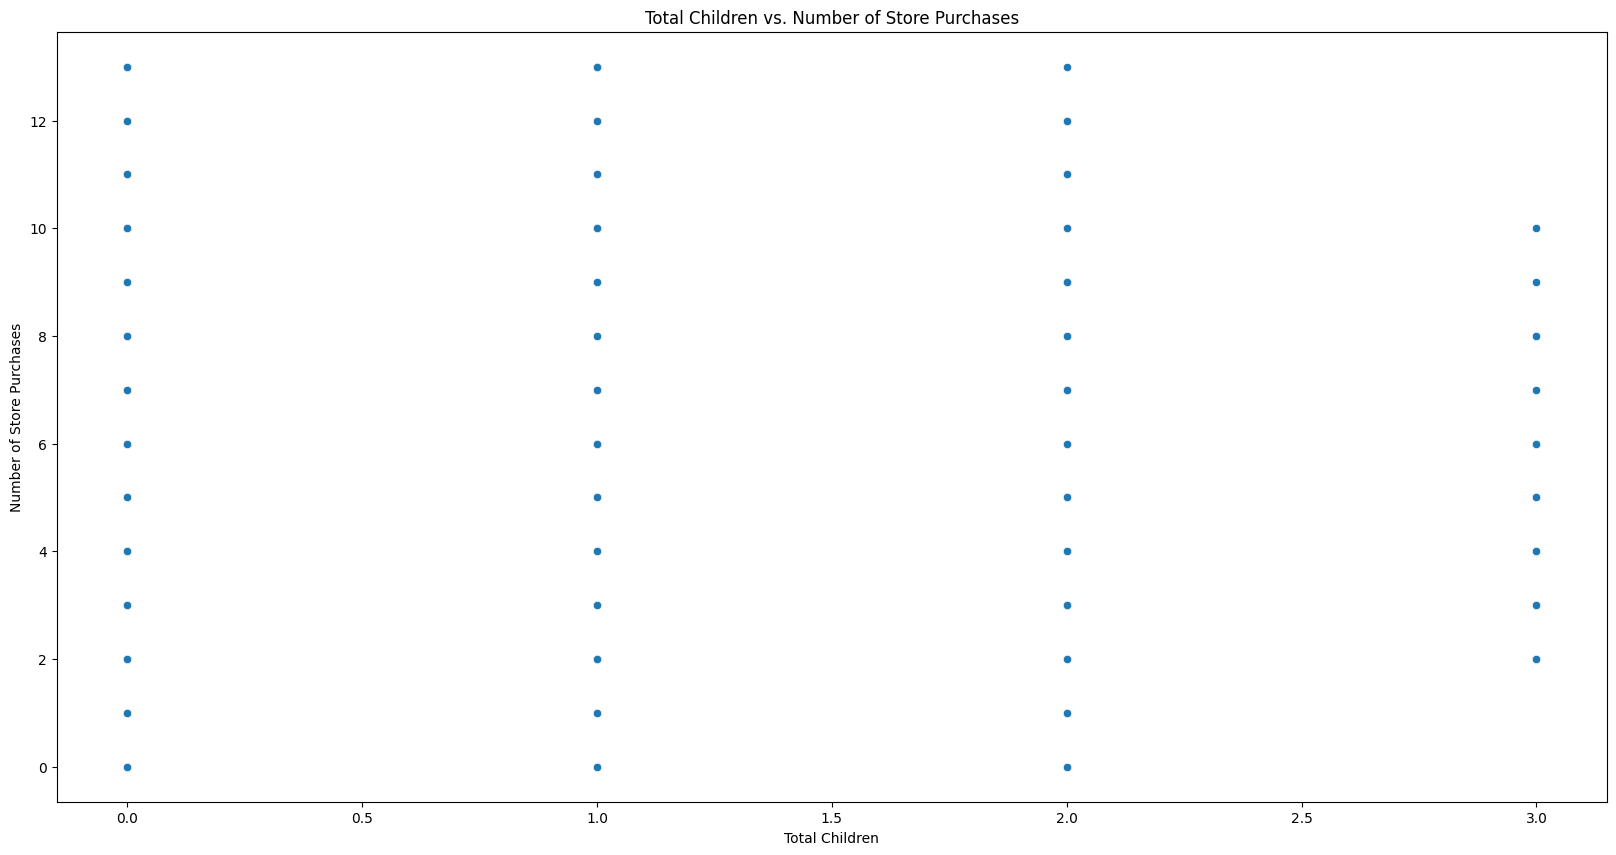

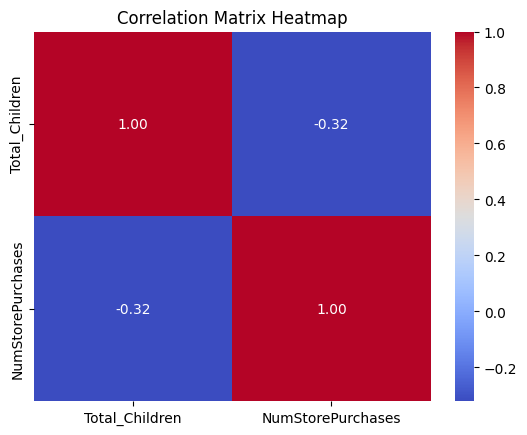

-0.3211249566328206

In [57]:
# Scatter plot of Total_Children vs. NumStorePurchases
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Total_Children', y='NumStorePurchases', data=data_encoded)
plt.title('Total Children vs. Number of Store Purchases')
plt.xlabel('Total Children')
plt.ylabel('Number of Store Purchases')
plt.show()

relevant_columns = ['Total_Children', 'NumStorePurchases']
corr_matrix_childvsstore = data_encoded[relevant_columns].corr()
sns.heatmap(corr_matrix_childvsstore, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation between Total_Children and NumWebPurchases
children_store_corr, _ = pearsonr(data_encoded['Total_Children'], data_encoded['NumStorePurchases'])
children_store_corr

Hypothesis (c): Cannibalization of in-store sales by alternative channels

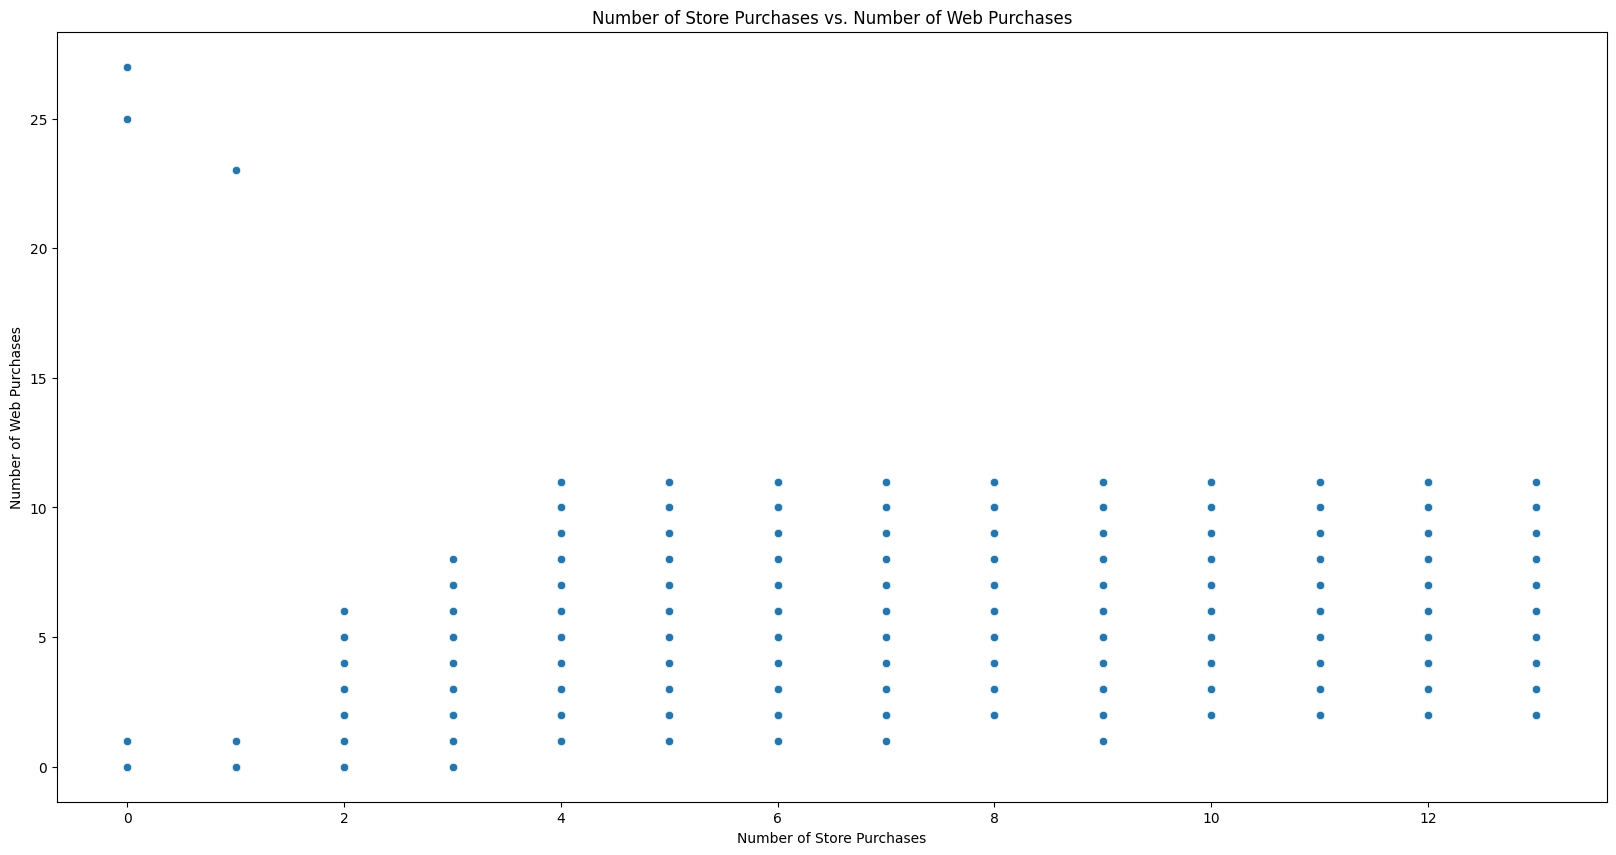

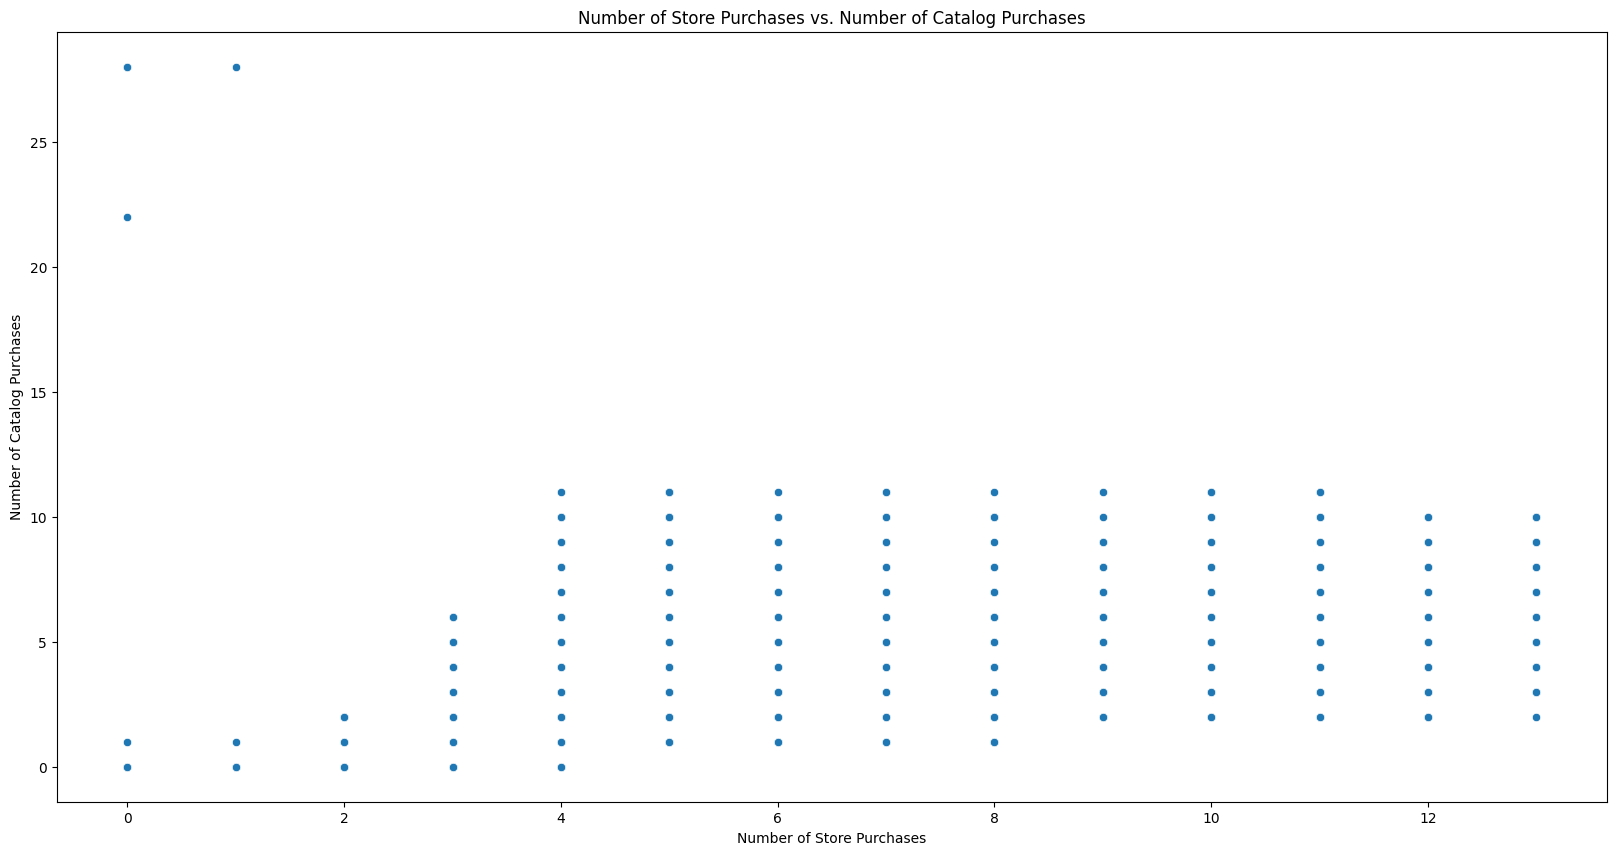

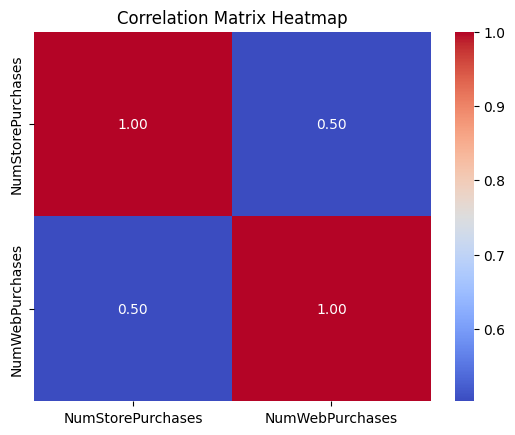

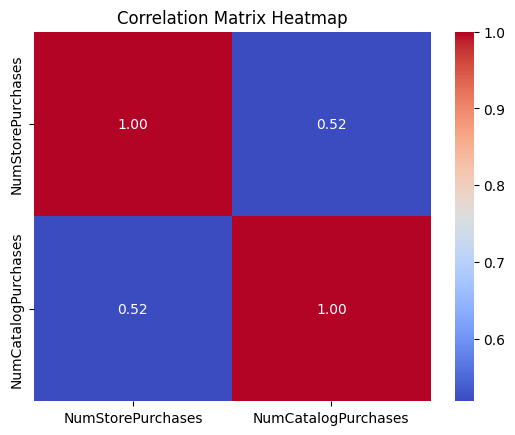

Correlation between Number of Store Purchases and Number of Web Purchases: 0.50
Correlation between Number of Store Purchases and Number of Catalog Purchases: 0.52


In [58]:
# Scatter plot of NumStorePurchases vs. NumWebPurchases
plt.figure(figsize=(20, 10))
sns.scatterplot(x='NumStorePurchases', y='NumWebPurchases', data=data_encoded)
plt.title('Number of Store Purchases vs. Number of Web Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Number of Web Purchases')
plt.show()

# Scatter plot of NumStorePurchases vs. NumCatalogPurchases
plt.figure(figsize=(20, 10))
sns.scatterplot(x='NumStorePurchases', y='NumCatalogPurchases', data=data_encoded)
plt.title('Number of Store Purchases vs. Number of Catalog Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Number of Catalog Purchases')
plt.show()

relevant_columns = ['NumStorePurchases', 'NumWebPurchases']
corr_matrix_storevsweb = data_encoded[relevant_columns].corr()
sns.heatmap(corr_matrix_storevsweb, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

relevant_columns = ['NumStorePurchases', 'NumCatalogPurchases']
corr_matrix_storevscatalog = data_encoded[relevant_columns].corr()
sns.heatmap(corr_matrix_storevscatalog, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation between NumStorePurchases and NumWebPurchases
store_web_corr, _ = pearsonr(data_encoded['NumStorePurchases'], data_encoded['NumWebPurchases'])
print(f'Correlation between Number of Store Purchases and Number of Web Purchases: {store_web_corr:.2f}')

# Correlation between NumStorePurchases and NumCatalogPurchases
store_catalog_corr, _ = pearsonr(data_encoded['NumStorePurchases'], data_encoded['NumCatalogPurchases'])
print(f'Correlation between Number of Store Purchases and Number of Catalog Purchases: {store_catalog_corr:.2f}')

Hypothesis (d): United States vs. Rest of the World in total purchase volumes

In [44]:
from scipy.stats import ttest_ind

# Creating a boolean mask for US customers
us_customers = data_encoded['Country_US'] == 1

# Total purchases for US customers
us_total_purchases = data_encoded[us_customers]['Total_Purchases']

# Total purchases for non-US customers
non_us_total_purchases = data_encoded[~us_customers]['Total_Purchases']

print(f"US Total_Purchases = {us_total_purchases.sum()}, Non-US Total_Purchases = {non_us_total_purchases.sum()}")

# T-test to compare the means of total purchases between US and non-US customers
t_stat, p_value = ttest_ind(us_total_purchases, non_us_total_purchases, equal_var=False)

print(f'T-test statistic: {t_stat:.2f}, p-value: {p_value:.2f}')

US Total_Purchases = 1473, Non-US Total_Purchases = 26610
T-test statistic: 1.47, p-value: 0.14


Part (a): Top-Performing and Lowest Revenue Products

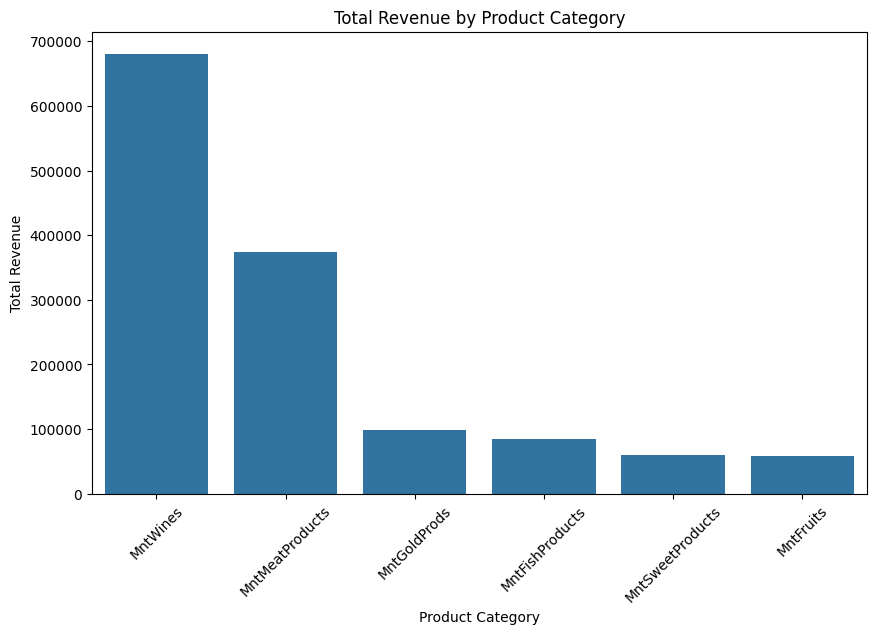

In [33]:
# Calculate total revenue for each product category
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_revenue = data[product_columns].sum().sort_values(ascending=False)

# Bar plot for product revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=total_revenue.index, y=total_revenue.values)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Part (b): Correlation between Age and Acceptance Rate of Last Campaign

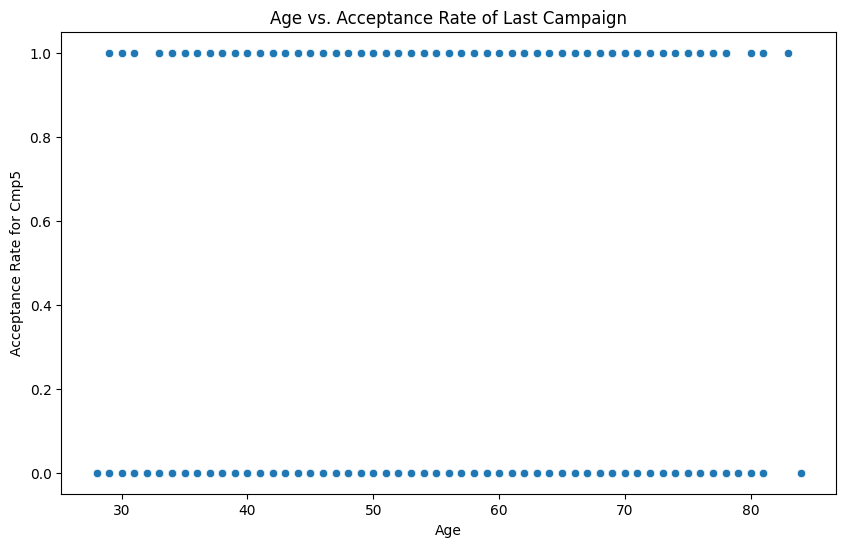

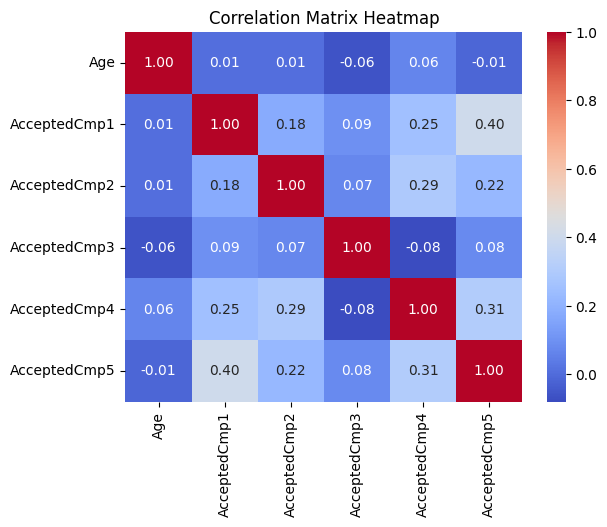

-0.01488650729744186

In [49]:
# Calculate correlation between Age and Response to the last campaign
age_response_corr, _ = pearsonr(data_encoded['Age'], data_encoded['AcceptedCmp5'])

# Scatter plot for Age vs. Response
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AcceptedCmp5', data=data_encoded)
plt.title('Age vs. Acceptance Rate of Last Campaign')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate for Cmp5')
plt.show()

relevant_columns = ['Age', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
corr_matrix_agevscampacc = data_encoded[relevant_columns].corr()
sns.heatmap(corr_matrix_agevscampacc, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

age_response_corr

There does not appear to be a clear/significant correlation between age and response rate

Part (c): Country with Highest Number of Customers Who Accepted the Last Campaign

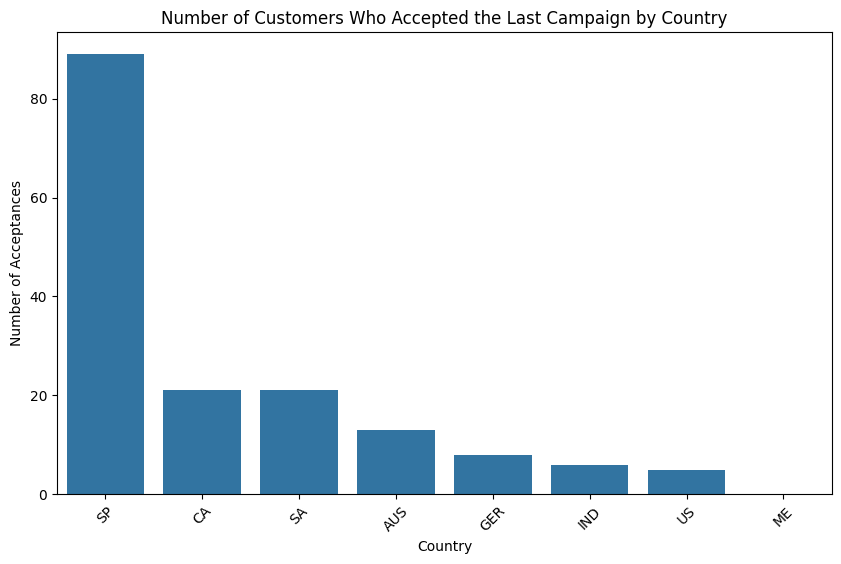

In [50]:
# Count the number of customers who accepted the last campaign by country
country_accepted = data.groupby('Country')['AcceptedCmp5'].sum().sort_values(ascending=False)

# Bar plot for country acceptance count
plt.figure(figsize=(10, 6))
sns.barplot(x=country_accepted.index, y=country_accepted.values)
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Number of Acceptances')
plt.xticks(rotation=45)
plt.show()

Spain is the country with the most number of campaign responses for the campaign 5

Part (d): Number of Children at Home and Total Expenditure

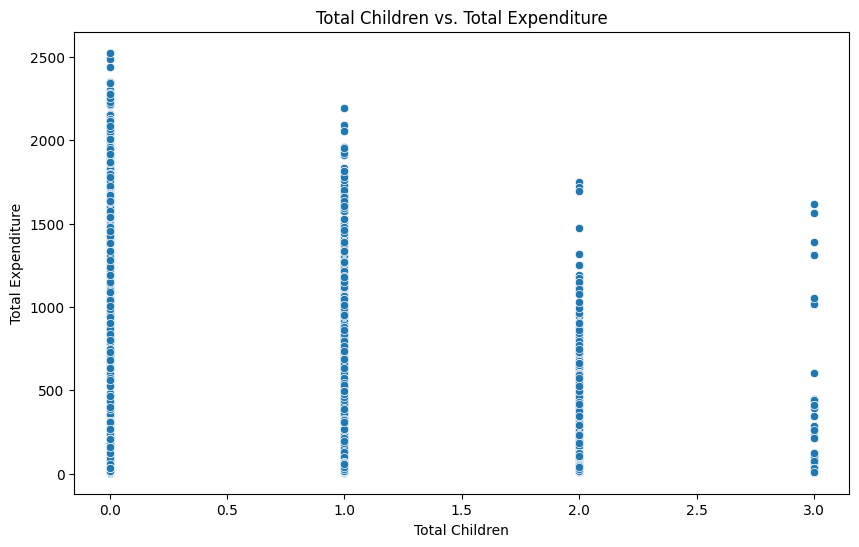

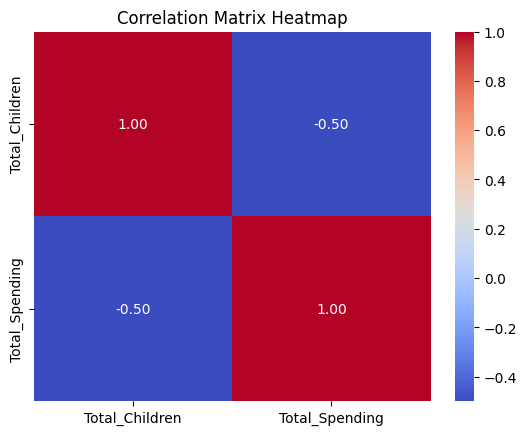

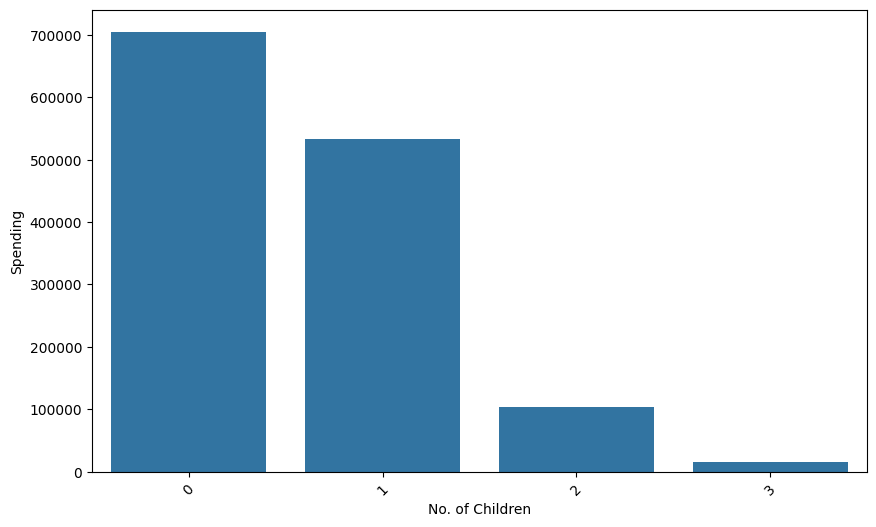

In [54]:
# Scatter plot for Total Children vs. Total Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Children', y='Total_Spending', data=data_encoded)
plt.title('Total Children vs. Total Expenditure')
plt.xlabel('Total Children')
plt.ylabel('Total Expenditure')
plt.show()

relevant_columns = ['Total_Children', 'Total_Spending']
corr_matrix_childvsspend = data_encoded[relevant_columns].corr()
sns.heatmap(corr_matrix_childvsspend, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Group by total children for bar plot
childvsspend = data.groupby('Total_Children')['Total_Spending'].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=childvsspend.index, y=childvsspend.values)
plt.title('')
plt.xlabel('No. of Children')
plt.ylabel('Spending')
plt.xticks(rotation=45)
plt.show()


Clearly, the people with fewer children spend more

Part (e): Educational Background of Customers Who Lodged Complaints

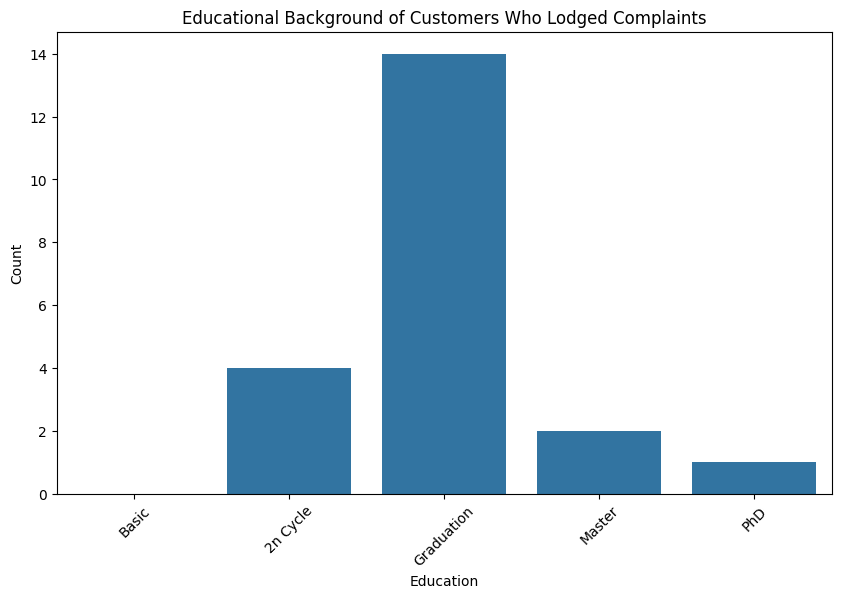

In [56]:
# Filter customers who lodged complaints
complaints_data = data[data['Complain'] == 1]

# Bar plot for educational background of customers who lodged complaints
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=complaints_data, order=education_order)
plt.title('Educational Background of Customers Who Lodged Complaints')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()